In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
import seaborn as sns; sns.set()

In [2]:
baseline_metrics = "./log_dir/baseline_1700486339.909711/"
ninety_rotation = "./log_dir/90_rotation_1700509435.178249/"
horizontal_flip = "./log_dir/horizontal_flip_1700507206.941485/"
random_crop = "./log_dir/random_crop_1700594571.537623/"
flip_rotate = "./log_dir/horizontal_flip_rotate_1702627398.593838/"
flip_crop = "./log_dir/horizontal_flip_crop_1702636319.585701/"

In [3]:
# Baseline Metrics
baseline_training_metrics = pd.read_csv(os.path.join(baseline_metrics, "training_metrics.csv"))
baseline_test_metrics = pd.read_csv(os.path.join(baseline_metrics, "test_metrics.csv"))

# 90 degree Rotation
ninety_rotation_training_metrics = pd.read_csv(os.path.join(ninety_rotation, "training_metrics.csv"))
ninety_rotation_test_metrics = pd.read_csv(os.path.join(ninety_rotation, "test_metrics.csv"))

# Horizontal Flip
horizontal_flip_training_metrics = pd.read_csv(os.path.join(horizontal_flip, "training_metrics.csv"))
horizontal_flip_test_metrics = pd.read_csv(os.path.join(horizontal_flip, "test_metrics.csv"))

# Random Crop
random_crop_training_metrics = pd.read_csv(os.path.join(random_crop, "training_metrics.csv"))
random_crop_test_metrics = pd.read_csv(os.path.join(random_crop, "test_metrics.csv"))

# Flip and Rotate
flip_rotate_training_metrics = pd.read_csv(os.path.join(flip_rotate, "training_metrics.csv"))
flip_rotate_test_metrics = pd.read_csv(os.path.join(flip_rotate, "test_metrics.csv"))

# Flip and Crop
flip_crop_training_metrics = pd.read_csv(os.path.join(flip_crop, "training_metrics.csv"))
flip_crop_test_metrics = pd.read_csv(os.path.join(flip_crop, "test_metrics.csv"))

#### Visualization of the Training Loss

In [5]:
loss_metrics = zip([int(idx) for idx in range(20)],
                   list(baseline_training_metrics["loss"]), 
                   list(ninety_rotation_training_metrics["loss"]), 
                   list(horizontal_flip_training_metrics["loss"]), 
                   list(random_crop_training_metrics["loss"]),
                   list(flip_rotate_training_metrics["loss"]),
                   list(flip_crop_training_metrics["loss"])
                  )

In [6]:
loss_metrics_df = pd.DataFrame(loss_metrics, 
                               columns=["epoch", 
                                        "without_augmentation",
                                        "rotation", 
                                        "horizontal_flip", 
                                        "random_crop", 
                                        "flip_rotate",
                                        "flip_crop"
                                       ])

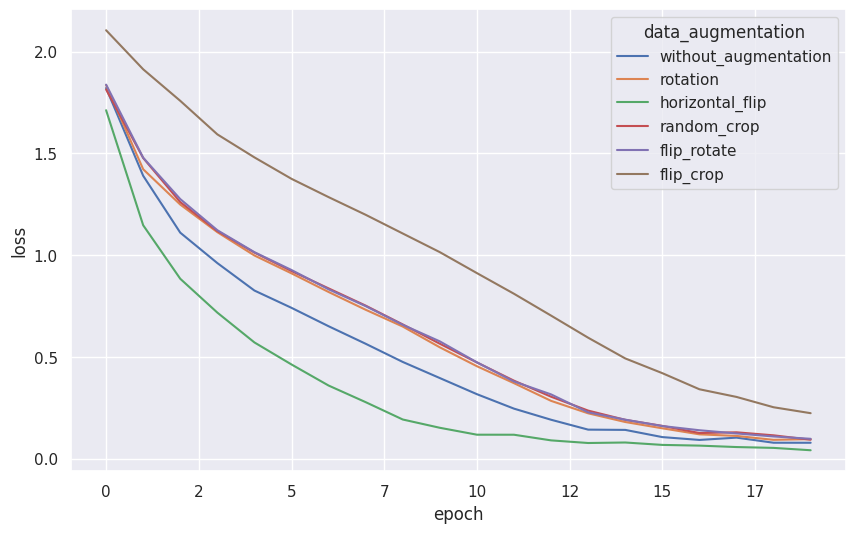

In [7]:
unpivot_df = pd.melt(loss_metrics_df, ["epoch"])
unpivot_df = unpivot_df.rename(columns={"variable": "data_augmentation", "value": "loss"})

plt.figure(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
sns.lineplot(data=unpivot_df, x="epoch", y="loss", hue="data_augmentation")
plt.savefig("screenshots/loss_graph.png")

#### Visualization of Test Accuracy

In [8]:
test_acc_metrics = zip(list(baseline_test_metrics["accuracy"]), 
                       list(ninety_rotation_test_metrics["accuracy"]), 
                       list(horizontal_flip_test_metrics["accuracy"]), 
                       list(random_crop_test_metrics["accuracy"]),
                       list(flip_rotate_test_metrics["accuracy"]),
                       list(flip_crop_test_metrics["accuracy"]),
                      )
test_acc_df = pd.DataFrame(test_acc_metrics, columns=["without_augmentation", 
                                                      "rotation", 
                                                      "horizontal_flip", 
                                                      "random_crop", 
                                                      "flip_rotate", "flip_crop"])

In [9]:
test_acc_df

,without_augmentation,rotation,horizontal_flip,random_crop,flip_rotate,flip_crop
0,73,76,88,76,75,61


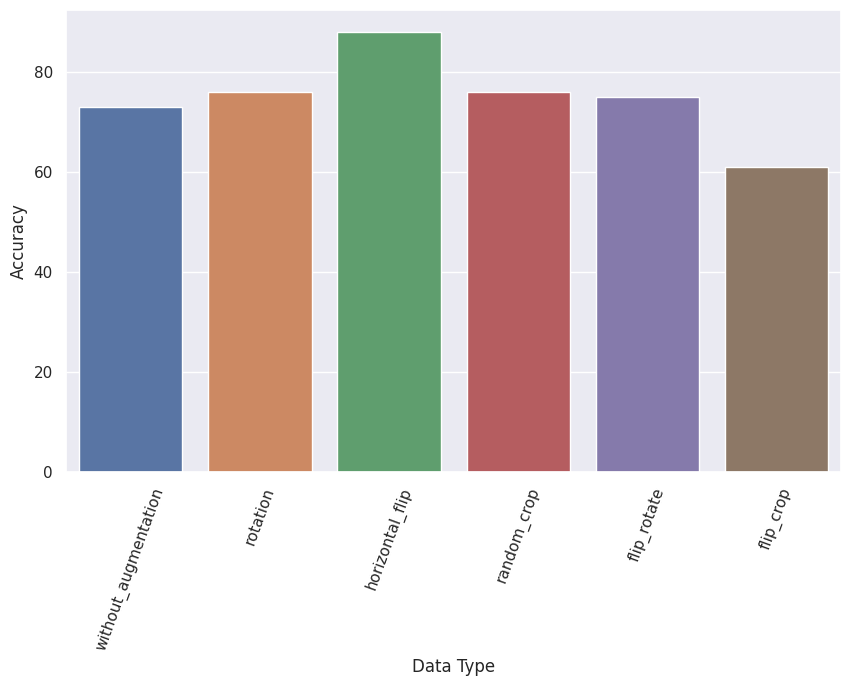

In [10]:
plt.figure(figsize=(10,6))
ax = sns.barplot(test_acc_df)
ax.set(xlabel='Data Type', ylabel='Accuracy')
plt.xticks(rotation=70)
plt.savefig("screenshots/accuracy_graph.png", bbox_inches='tight')